# Lineare Regression
## Ein einfaches Machine Learning Modell

## 0. Generation des Datensatzes (muss nicht nachvollzogen werden)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# y-Werte folgen einem linearen Zusammenhang plus zufälligem Fehler
def wahres_y(x, a = 0.42, eps = 0.25):
    noise = np.random.normal(np.zeros(x.shape[0])) * eps
    return a*x + noise

In [3]:
N_DATA = 100
x_bereich = np.linspace(0,10,N_DATA)

# wähle 80 Prozent des Datensatzes als Trainingsset:
train_indices = np.random.choice(np.arange(N_DATA), int(N_DATA*0.8), False)
test_indices = np.setdiff1d(np.arange(N_DATA), train_indices)

x_train = x_bereich[train_indices]
x_test = x_bereich[test_indices]

y_train = wahres_y(x_train)
y_test = wahres_y(x_test)

## 1. Visualisierung des Datensatzes

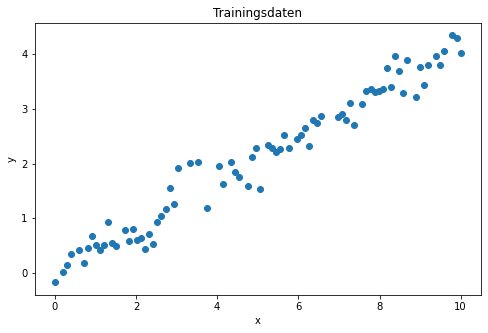

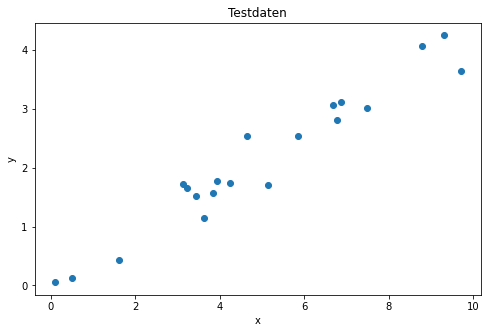

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)
plt.title("Trainingsdaten")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test)
plt.title("Testdaten")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 2. Modellauswahl:

$$ \hat{y}(x) = ax$$

## Ziel: Nutze die Trainingsdaten um für neue x-Werte einen y-Wert vorherzusagen.

Annahme: Wenn unser Modell gut auf den Trainingsdaten ist, ist es auch gut auf ungesehenen Daten. Das überprüfen wir nach dem Training mit den Testdaten, die während des Trainings ignoriert werden.

Was ist "gut"? Wir bewerten die Güte unseres Modells mit der sogenannten Loss Funktion. Diese können wir frei wählen, sie sollte ein Maß dafür sein, wie weit die vorhergesagten Werte von den wahren Werten abweichen.

Wir wählen die Summe der quadrierten Fehler der y-Werte des Modells:

$$Loss = (y_1-\hat{y}_1)^2 + (y_2-\hat{y}_2)^2 + \dots$$

Die Loss Funktion hängt von den Trainingsdaten und von den Modell-Parametern (über $\hat{y}$) ab.

Die 1 und die 2 sind sogenannte Indices (Plural von Index), die angeben, der wievielte Datenpunkt in unserer Menge der Datenpunkte $\{(x,y)\}$ gemeint ist.

In [5]:
def model(x, a):
    return a*x

## 3. Auswahl der Loss Funktion:

Wir wählen den sogenannten Mean Squared Error (MSE) als Loss Funktion:

$$Loss(a, \text{Trainingsdaten}) = \frac{1}{N}\sum_{i=1}^N \left(\hat{y}_i - y\right)^2$$

## 4. Training

Suche den Parameter, für den der Loss auf dem Trainingsset minimal ist. Das Testset wird dabei ignoriert.

$$ \hat{a} = \underset{a}{\text{argmin}} \: Loss(a)$$

In unserem Fall kann der Parameter a analytisch bestimmt werden, indem die Ableitung des Losses nach a an der Stelle $\hat{a}$ auf null gesetzt wird:

$$ 0 = \frac{d}{da}Loss\big|_a  \Longrightarrow a = \frac{1}{2}\frac{\sum_{i=1}^Nx_iy_i}{\sum_{i=1}^Nx_i^2}$$

In [6]:
def train(x, y):
    summe_x_quadrate = np.sum(x*x)
    summe_x_y = np.sum(x*y)
    a_predicted = summe_x_y / summe_x_quadrate
    return a_predicted

In [7]:
a = train(x_train, y_train)

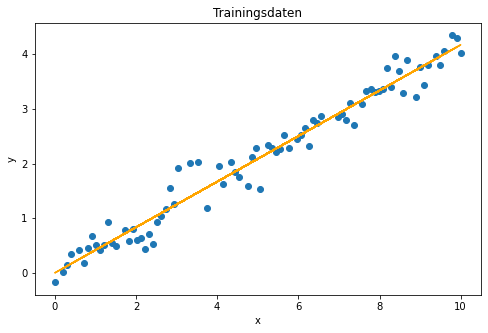

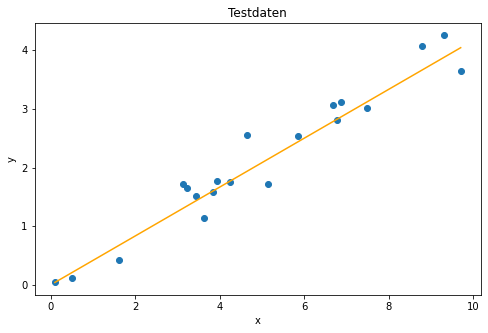

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)
plt.plot(x_train, model(x_train, a), color="orange", label="vorhersage")
plt.title("Trainingsdaten")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test)
plt.plot(x_test, model(x_test, a), color="orange", label="vorhersage")
plt.title("Testdaten")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 5. Untersuchung der Vorhersagen

Wir können zum Beispiel die Loss Funktion für unser Modell auf Trainings- und Testset auswerten:

In [9]:
def MSE(y1,y2):
    N = y1.shape[0]
    differenzen = y1-y2
    quadrate = differenzen*differenzen
    summe = np.sum(quadrate)
    return summe / N

In [10]:
print("Train Loss: ", round(MSE(y_train, model(x_train, a)), 4))

print("Test Loss:  ", round(MSE(y_test, model(x_test, a)), 4))

Train Loss:  0.0581
Test Loss:   0.0851


Wir können aber auch in einem anderen Kriterium untersuchen, wie gut unser Modell ist, z.B. mit dem sog. Mean Absolute Error (MAE).

Das ist der durschnittliche Abstand der wahren y-Werte zu den verhergesagten y-Werten.

$$MAE = |y_1-\hat{y}_1| + |y_2-\hat{y}_2|+\dots$$